In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
242,7576-ASEJU,Female,0,Yes,Yes,41,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),74.70,3187.65,No
2882,6652-YFFJO,Female,0,No,No,11,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,64.90,716.1,No
4042,5404-GGUKR,Male,0,No,No,5,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,51.35,262.3,No
2441,9050-IKDZA,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,81.50,162.55,No
6504,6110-OHIHY,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,79.25,267.6,Yes


In [5]:
df["Churn"].value_counts()
#data uneven hai, non-churn wala admi zyda hai, this will result in over fitting. Will look into it shortly.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')
#Null values ko ignore karne k liye errors wala argument dala.

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [14]:
#As very less number of null values in TotalCharges, so lets fill it with the mean.

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#dusra copy banata dataframe ka. safety k liye
df_copy=df.copy()

In [16]:
df_copy["tenure"].max()

72

Grouping Tenure to handle its wide range of values

In [17]:
#not required format

df_copy['Tenure_group'] = df_copy['tenure'].apply(lambda x: 12*np.floor(x/12))
df_copy.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
4935,4584-LBNMK,Male,1,Yes,No,45,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.70,1174.35,No,36.0
5691,5619-XZZKR,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,68.20,No,0.0
6554,2856-HYAPG,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,No,Electronic check,68.65,68.65,Yes,0.0
4564,4877-EVATK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20.00,Yes,0.0
6219,1496-GGSUK,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,25.70,25.70,Yes,0.0


In [18]:
df_copy.drop(columns=["Tenure_group"],axis=1,inplace=True)

In [19]:
df_copy.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
310,1098-TDVUQ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.25,19.25,No


In [20]:
format_tenure = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=format_tenure)
df_copy.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2612,8198-RKSZG,Female,0,Yes,Yes,14,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),80.45,1137.05,No,13 - 24
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,1 - 12
3981,1200-TUZHR,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,No,Electronic check,85.20,695.75,No,1 - 12
4886,2673-ZALNP,Female,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,173.15,No,1 - 12
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No,13 - 24


In [21]:
#removing the columns
df_copy.drop(columns=["tenure","customerID"], axis=1, inplace=True)
df_copy.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3556,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.50,No,1 - 12
5952,Female,0,No,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.45,84.20,No,1 - 12
2405,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,777.30,Yes,1 - 12
2809,Male,1,No,No,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,36.65,1315.00,No,37 - 48
4338,Male,1,No,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,No,Credit card (automatic),45.40,214.75,No,1 - 12


In [22]:
df_copy["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
# df_copy[df_copy.gender == "Male"] = 1
# df_copy[df_copy.gender == "Female"] = 0---------error hai
df_copy["gender"]=np.where(df_copy["gender"]=="Male",1,0)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,1,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,1,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,0,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [24]:
df_copy["gender"].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [25]:
columns=list(df_copy.columns.values)
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [26]:
item_list = [e for e in columns if e not in ("Churn", "TotalCharges", "MonthlyCharges")]
item_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

# Univariant analysis

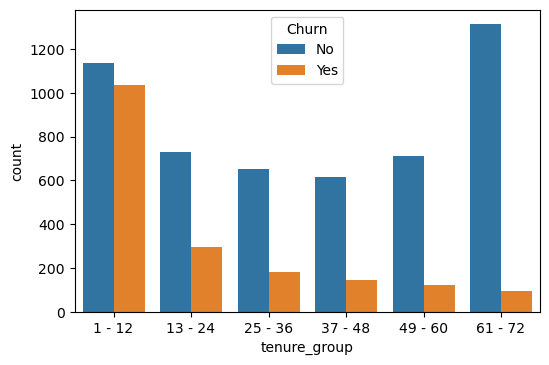

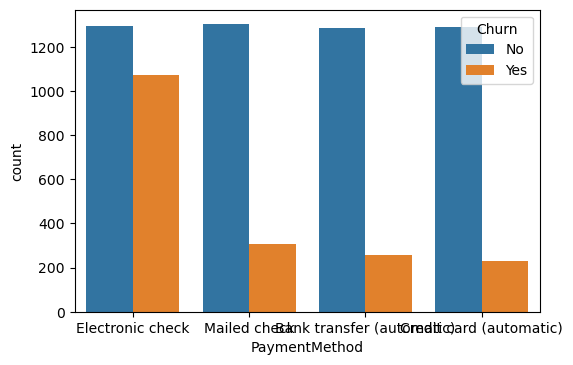

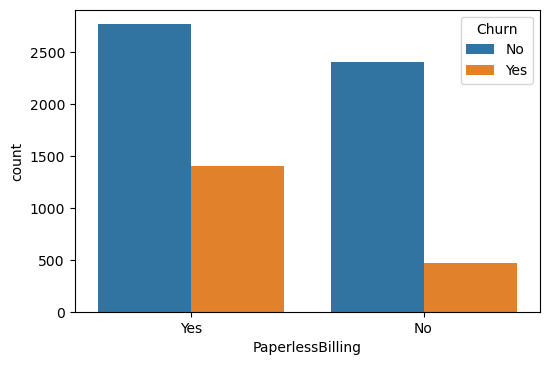

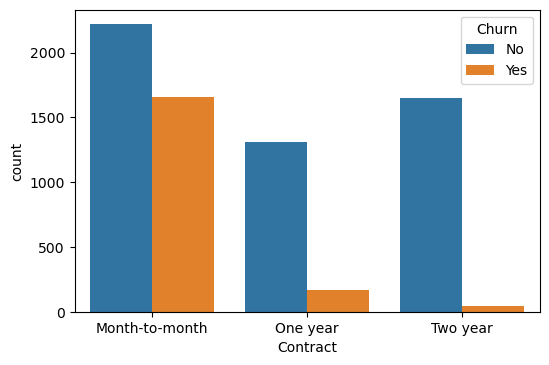

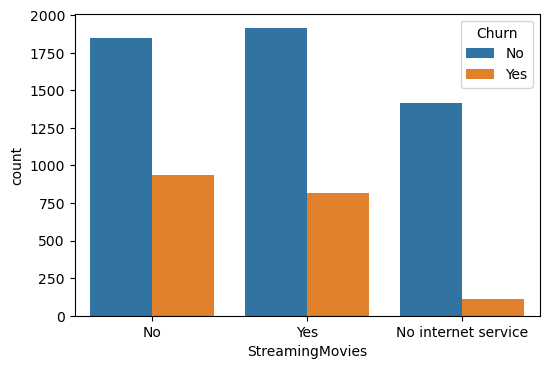

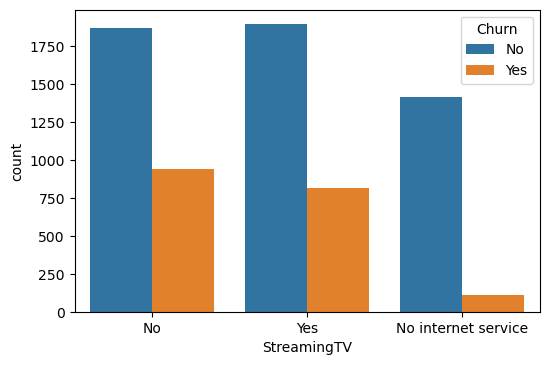

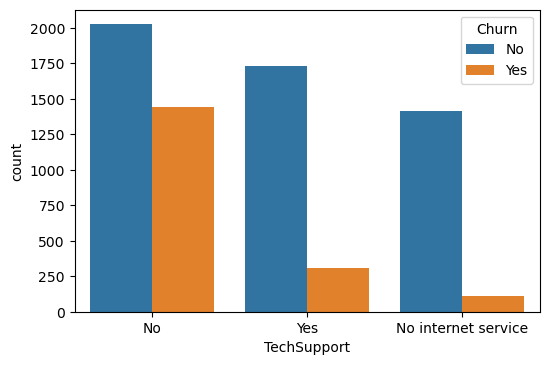

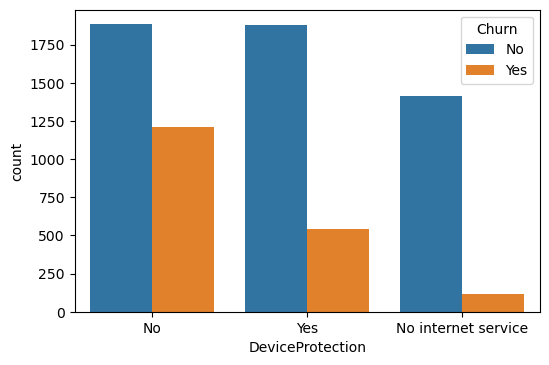

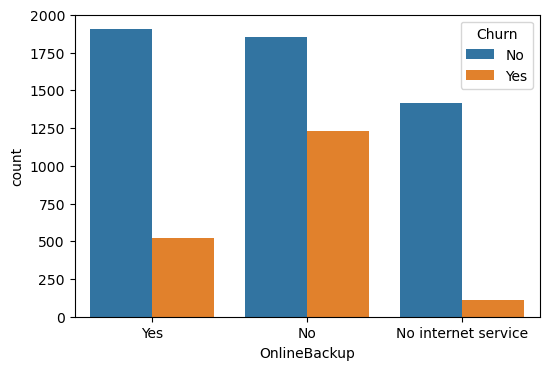

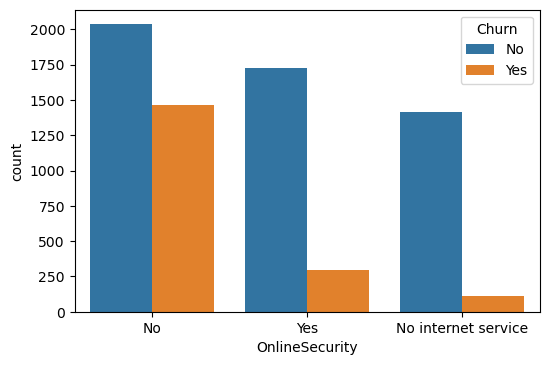

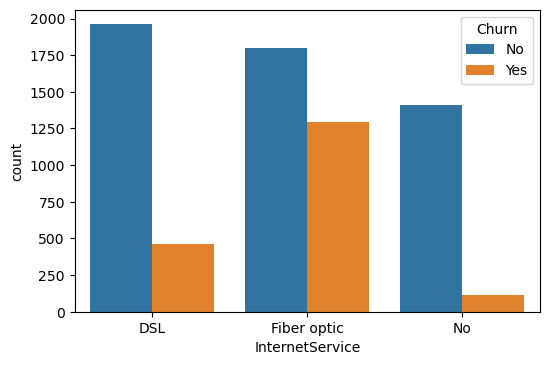

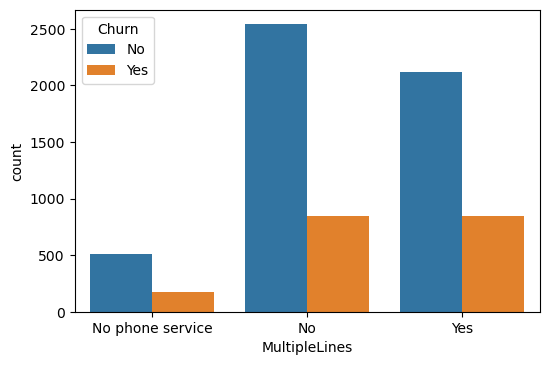

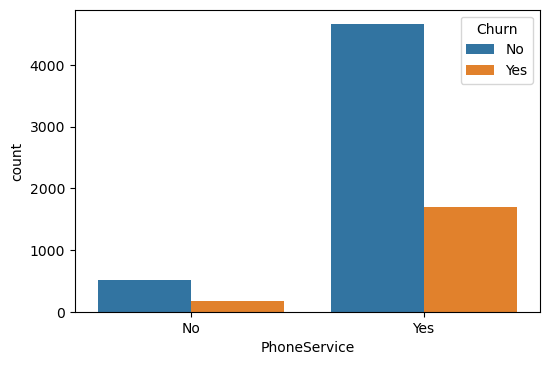

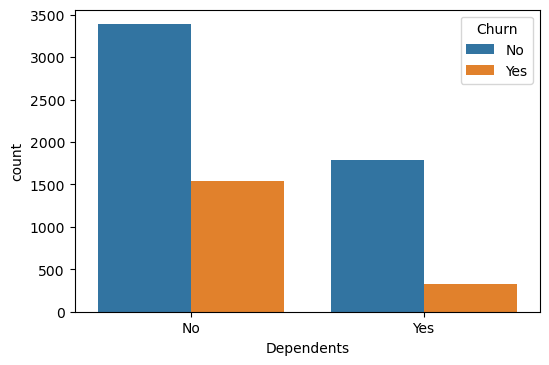

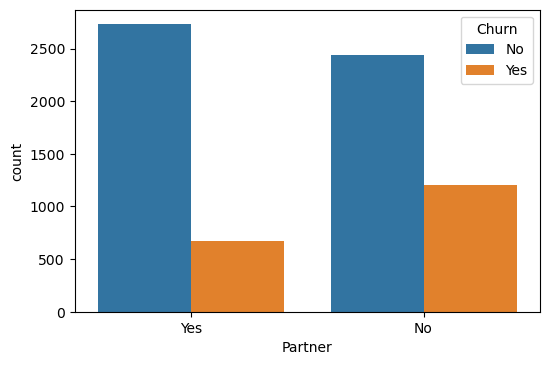

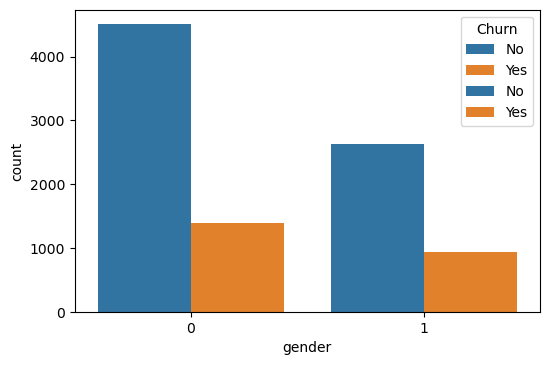

In [27]:
#Recurtion method

def count_plot(n):
    if n==0:
        sns.countplot(data=df_copy,x=item_list[0],hue="Churn")
        return "done"
    else:
        plt.figure(dpi=100)
        sns.countplot(data=df_copy,x=item_list[n],hue="Churn")
        count_plot(n-1)
        
count_plot(len(item_list)-1)

In [28]:
for i in range(len(item_list)):
    print(f"{df_copy[item_list[i]].value_counts()}")

1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
N

In [29]:
df_dummies = pd.get_dummies(df_copy)
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,1,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
2,1,0,53.85,108.15,1,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,0
3,1,0,42.30,1840.75,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,70.70,151.65,1,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0


In [30]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,1,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,1,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,0,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [31]:
df_dummies.drop(columns=["Partner_No","Dependents_No","PhoneService_No"], axis=1, inplace=True)
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,1,0,53.85,108.15,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,1,0,42.30,1840.75,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,70.70,151.65,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,0


In [32]:
df_dummies.drop(columns=["MultipleLines_Yes","Churn_No","PaperlessBilling_No"], axis=1, inplace=True)
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,53.85,108.15,0,0,1,1,0,1,...,0,0,1,1,1,0,0,0,0,0
3,1,0,42.30,1840.75,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,70.70,151.65,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,0


In [33]:
df_dummies.drop(columns=["OnlineSecurity_Yes","OnlineBackup_Yes","DeviceProtection_Yes","TechSupport_Yes","StreamingTV_Yes","StreamingMovies_Yes"], axis=1, inplace=True)
df_dummies.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,53.85,108.15,0,0,1,1,0,1,...,0,0,1,1,1,0,0,0,0,0
3,1,0,42.30,1840.75,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,70.70,151.65,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

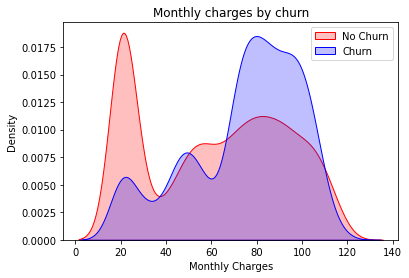

In [34]:
Monthly = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 0) ],
                color="Red", shade = True)
Monthly = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 1) ],
                ax =Monthly, color="Blue", shade= True)
Monthly.legend(["No Churn","Churn"],loc='upper right')
Monthly.set_ylabel('Density')
Monthly.set_xlabel('Monthly Charges')
Monthly.set_title('Monthly charges by churn')

as the monthly charge increases, the number of churners also increase. Lets see in case of Total charges:

Text(0.5, 1.0, 'Total charges by churn')

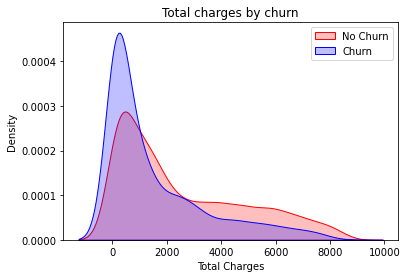

In [36]:
Total = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn_Yes"] == 0) ],
                color="Red", shade = True)
Total = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn_Yes"] == 1) ],
                ax =Total, color="Blue", shade= True)
Total.legend(["No Churn","Churn"],loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges by churn')

Strange, as there are less churners compared to no churners as the total charges increase. This maybe because as the tenure increase, the customers become more loyal.

<AxesSubplot:>

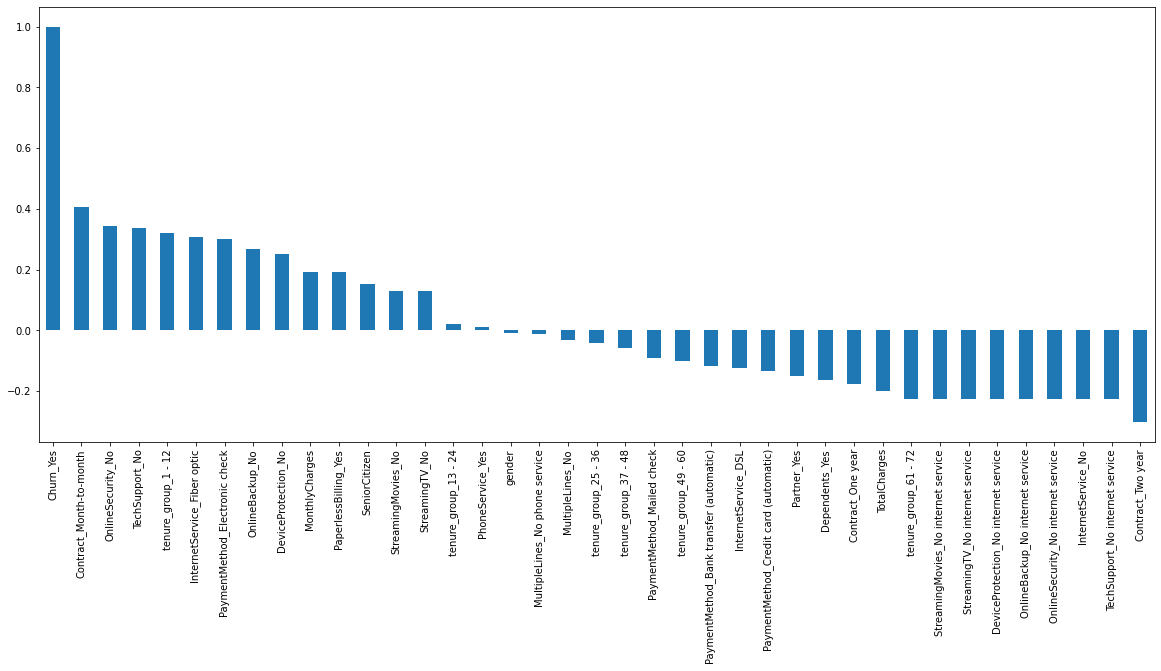

In [38]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

# Interpretations:
We can see with increase in tenure (also with contracts), the churners decrease. Also people with no internet service tend to not churn.

In [39]:
df_dummies.to_csv("clean_tel.csv")